In [1]:
import pandas as pd

# data


In [3]:
ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)
ailments_data.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)

In [4]:
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()

Missing values:  phrase    0
prompt    0
dtype: int64


In [5]:
ailments_data.shape

(151, 2)

# data counts


In [6]:

from collections import Counter
# Number of ailments
print('Number of categories: ', ailments_data['prompt'].nunique())

# Print class distribution
counter = Counter(ailments_data['prompt'])
for k, v in counter.items():
    per = v / len(ailments_data['prompt']) * 100
    print('Class=%s, n=%d (%.3f%%)' % (k, v, per))

Number of categories:  7
Class=Allergy, n=21 (13.907%)
Class=Anemia, n=28 (18.543%)
Class=Bronchitis, n=16 (10.596%)
Class=Diarrhea, n=12 (7.947%)
Class=Fatigue, n=20 (13.245%)
Class=Flu, n=31 (20.530%)
Class=Stress, n=23 (15.232%)


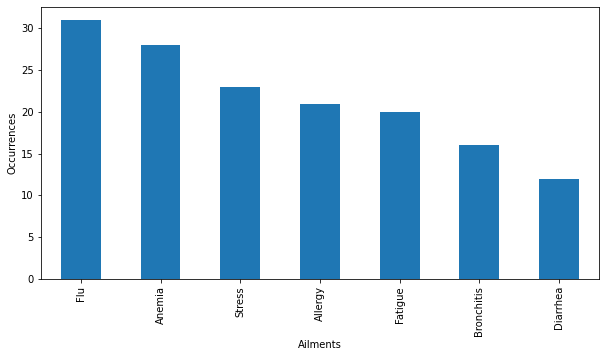

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
ailments_data['prompt'].value_counts().plot(kind='bar')
plt.xlabel('Ailments')
plt.ylabel('Occurrences')
plt.show()


In [8]:
Flu = ailments_data.loc[ailments_data['prompt'] == 'Flu']
Diarrhea = ailments_data.loc[ailments_data['prompt'] == 'Diarrhea']

In [9]:
ailments_data

,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
147,أنا قلق جدا,Stress
148,أريد أن أنام، أنا نعسان,Stress
149,الانزعاج والقلق التي احس بها من النوع الذي يظه...,Stress
150,أشعر بالحزن والاحباط,Stress


# data aug


In [10]:
X = ailments_data.iloc[:,0]
y = ailments_data.iloc[:,1]

In [11]:
ailments_data
ailments_data['prompt'].value_counts()
#len(ailments_data.loc[ailments_data['prompt'] == 'Diarrhea'])

#columns=ailments_data['prompt'].unique()

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64

In [12]:
pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 410 kB 29.7 MB/s 


In [13]:
from statistics import mode
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

#print(mode(ailments_data['prompt']) ,' ',ailments_data['prompt'].value_counts()[0])
#symptoms=list(ailments_data['prompt'].unique())
max_count = ailments_data['prompt'].value_counts()[0]

aug_data = ailments_data
 
for ind in ailments_data.index:
  label = aug_data['prompt'][ind]
  texts = aug_data['phrase'][ind]
  name_count = len(aug_data.loc[aug_data['prompt'] == label])
  #print(name_count,' ',max_count)
  if name_count < max_count:
    #print(label) 
    aug = naw.RandomWordAug(action="swap")

    if max_count - name_count > name_count:
       augmented_text = aug.augment(texts,n=2)
    else:
       augmented_text = aug.augment(texts,n=1)

    for string in augmented_text:
       aug_data = aug_data.append({'phrase' : string,
                      'prompt' : label} , 
                      ignore_index=True)



#manual oversample




In [14]:
print(aug_data['prompt'].value_counts())
aug_data

Allergy       31
Anemia        31
Bronchitis    31
Fatigue       31
Flu           31
Stress        31
Diarrhea      26
Name: prompt, dtype: int64


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
207,اضطرابات لدي في لاسباب النوم مختلفة,Stress
208,لدي اضطرابات: نفسية كالعصبية ، والغضب الغير ال...,Stress
209,لدي مشكلة فقدان الشعر,Stress
210,مشاكل لدي التركيز,Stress


In [ ]:
  aug_data

,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
207,لدي اضطرابات النوم لاسباب في مختلفة,Stress
208,لدي اضطرابات نفسية: ، كالعصبية والغضب المفرط ا...,Stress
209,فقدان لدي مشكلة الشعر,Stress
210,مشاكل لدي التركيز,Stress


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

def dataAugFun(ailments_data, N):


  aug_data = ailments_data.head(0)

  texts = ailments_data['phrase']
  for ind in ailments_data.index:
      texts = ailments_data['phrase'][ind]
      label = ailments_data['prompt'][ind]
      aug = naw.RandomWordAug(action="swap")
      augmented_text = aug.augment(texts,n=N)
      
      for string in augmented_text:
        aug_data = aug_data.append({'phrase' : string,
                        'prompt' : label} , 
                        ignore_index=True)

    
  return aug_data

In [ ]:
aug_datax2 = dataAugFun(aug_data , 2)

aug_datax2

,phrase,prompt
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,Allergy
1,أعاني أنا صعوبة من في التنفس التكلم و و البلع,Allergy
2,أنا أعاني القيء من و الاسهال ألم و المعدة في,Allergy
3,أعاني أنا القيء من و الاسهال ألم و في المعدة,Allergy
4,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,Allergy
...,...,...
419,لدي فقدان الشعر مشكلة,Stress
420,مشاكل التركيز لدي,Stress
421,لدي مشاكل التركيز,Stress
422,الأرق أعاني من,Stress


# preprocess


In [ ]:
print(aug_datax2['prompt'].value_counts())
aug_datax2

Allergy       62
Anemia        62
Bronchitis    62
Fatigue       62
Flu           62
Stress        62
Diarrhea      52
Name: prompt, dtype: int64


,phrase,prompt
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,Allergy
1,أعاني أنا صعوبة من في التنفس التكلم و و البلع,Allergy
2,أنا أعاني القيء من و الاسهال ألم و المعدة في,Allergy
3,أعاني أنا القيء من و الاسهال ألم و في المعدة,Allergy
4,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,Allergy
...,...,...
419,لدي فقدان الشعر مشكلة,Stress
420,مشاكل التركيز لدي,Stress
421,لدي مشاكل التركيز,Stress
422,الأرق أعاني من,Stress


In [ ]:

from sklearn import preprocessing
import numpy

#rename columns
DATA_COLUMN = "text"
LABEL_COLUMN = "label"
aug_datax2.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)
aug_datax2.columns = [DATA_COLUMN, LABEL_COLUMN]

# Convert labels to numbers

le = preprocessing.LabelEncoder()
le.fit(aug_datax2[LABEL_COLUMN])

le.classes_


y = le.transform(aug_datax2[LABEL_COLUMN])
# print(le.inverse_transform(y))


# compare before and after
print(aug_datax2[LABEL_COLUMN].value_counts())
unique, counts = numpy.unique(y, return_counts=True)
afterEncoder = dict(zip(unique, counts))
dict(sorted(afterEncoder.items(), key=lambda item: item[1], reverse=True))

aug_datax2[LABEL_COLUMN]=y

Allergy       62
Anemia        62
Bronchitis    62
Fatigue       62
Flu           62
Stress        62
Diarrhea      52
Name: label, dtype: int64


In [ ]:
aug_datax2

,text,label
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,0
1,أعاني أنا صعوبة من في التنفس التكلم و و البلع,0
2,أنا أعاني القيء من و الاسهال ألم و المعدة في,0
3,أعاني أنا القيء من و الاسهال ألم و في المعدة,0
4,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,0
...,...,...
419,لدي فقدان الشعر مشكلة,6
420,مشاكل التركيز لدي,6
421,لدي مشاكل التركيز,6
422,الأرق أعاني من,6


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec

# model before lemitization

In [ ]:
# prepare tokenizer

t = Tokenizer()
t.fit_on_texts(aug_datax2.iloc[:,0])
vocab_size = len(t.word_index) + 1
# integer encode the documents

encoded_docs = t.texts_to_sequences(aug_datax2.iloc[:,0])

print('encoded_docs:\n',max(encoded_docs))

max_length = 0

for doc in encoded_docs:
  if len(doc) > max_length:
    max_length = len(doc)


# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print('padded_docs:\n',padded_docs)

encoded_docs:
 [415, 6, 416]
padded_docs:
 [[  3   8  14 ...   0   0   0]
 [ 14   3  10 ...   0   0   0]
 [  3  14  98 ...   0   0   0]
 ...
 [  1  32  28 ...   0   0   0]
 [230  14   8 ...   0   0   0]
 [230  14   8 ...   0   0   0]]


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(padded_docs)
df['label'] = aug_datax2.iloc[:,1]
df.iloc[:,:padded_docs.shape[1]]


df=df.dropna()

In [ ]:
LABEL_COLUMN = 'label'
df[LABEL_COLUMN] = df[LABEL_COLUMN].astype('category')

df[LABEL_COLUMN] = df[LABEL_COLUMN].cat.codes
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label
0,3,8,14,10,5,2,13,97,5,42,0,0,0,0,0,0,0,0
1,14,3,10,8,2,13,97,5,5,42,0,0,0,0,0,0,0,0
2,3,14,98,8,5,22,20,5,15,2,0,0,0,0,0,0,0,0
3,14,3,98,8,5,22,20,5,2,15,0,0,0,0,0,0,0,0
4,33,69,99,6,100,101,70,102,43,44,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,1,96,77,229,0,0,0,0,0,0,0,0,0,0,0,0,0,6
420,32,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
421,1,32,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
422,230,14,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
from sklearn.model_selection import train_test_split
#xtrain,ytrain, test = train_test_split(df, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:padded_docs.shape[1]], df['label'], test_size=0.15, random_state=42)
# # all_datasets.append(data_Hard)

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))


clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [ ]:
Y_pred = clf.predict(X_test)  
score_test = compute_accuracy(y_test, Y_pred)  

In [ ]:
score_test

0.28125

In [ ]:
X_pred = clf.predict(X_train)  
score_test = compute_accuracy(y_train, X_pred)  

In [ ]:
score_test

0.5305555555555556

In [ ]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Y_pred_NB = Cnb.fit(X_train, y_train).predict(X_train)


In [ ]:
score_test_NB = compute_accuracy(y_train, Y_pred_NB) 

In [ ]:
score_test_NB

0.8861111111111111

In [ ]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Y_pred_NB = Cnb.fit(X_train, y_train).predict(X_test)


In [ ]:
score_test_NB = compute_accuracy(y_test, Y_pred_NB) 

In [ ]:
score_test_NB

0.59375

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
172,40,7,4,3,19,65,0,0,0,0,0,0,0,0,0,0,0
370,1,167,5,30,11,39,0,0,0,0,0,0,0,0,0,0,0
312,111,8,2,14,71,0,0,0,0,0,0,0,0,0,0,0,0
42,117,3,4,25,118,47,4,119,120,13,121,0,0,0,0,0,0
173,40,7,4,19,65,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,7,6,126,284,283,0,0,0,0,0,0,0,0,0,0,0,0
106,2,17,10,13,0,0,0,0,0,0,0,0,0,0,0,0,0
270,8,14,230,0,0,0,0,0,0,0,0,0,0,0,0,0,0
348,8,153,10,1,2,13,4,154,156,9,155,0,0,0,0,0,0


# lemitization and model

In [ ]:
pip install qalsadi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import qalsadi.lemmatizer
%pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def text_transform(message):

    # (a) change the message to lowercase
    message = message.lower()

    # (b) tokenize the message,
    # i.e. if input = 'i am a student.'
    # then, output  = ['i', 'am', 'a', 'student', '.']
    message = nltk.word_tokenize(message)

    # (c) remove special characters in the message
    msg_temp = []
    for word in message:
        # only accpet the alpha-numeric words and remove all other cases e.g. special characters
        if word.isalnum():
            msg_temp.append(word)

    message = msg_temp

    # (d) remove stopwords and punctuations
    msg_temp = []
    for word in message:
        if word not in stopwords.words('arabic') and word not in string.punctuation:
            msg_temp.append(word)

    message = msg_temp

    # (e) lemmatization function
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    msg_temp = []
    for word in message:
        msg_temp.append(lemmer.lemmatize(word))

    # join all words with space and return new message
    new_message = " ".join(msg_temp)

    return new_message


aug_datax2
# apply the pre-processing steps via text_transform() function on text data
aug_datax2['transformed_phrase'] = aug_datax2[DATA_COLUMN].apply(
    text_transform)

X = aug_datax2.transformed_phrase
X.tail()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Exception ignored in: <function WordFreqDictionary.__del__ at 0x7f05c2c48f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/arramooz/wordfreqdictionaryclass.py", line 130, in __del__
    self.db_connect.close()
sqlite3.ProgrammingError: SQLite objects created in a thread can only be used in that same thread. The object was created in thread id 139667063371648 and this is thread id 139666668136192.
Exception ignored in: <function ArabicDictionary.__del__ at 0x7f05c175ddd0>
Traceback (most recent call

419    لد قد شعر مشكل
420    مشاكل تركيز لد
421    لد مشاكل تركيز
422          أرق عانة
423          أرق عانة
Name: transformed_phrase, dtype: object

In [ ]:
aug_datax2

,text,label,transformed_phrase
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,0,عانة صعوبة تنفس تكلم بلع
1,أعاني أنا صعوبة من في التنفس التكلم و و البلع,0,عانة صعوبة تنفس تكلم بلع
2,أنا أعاني القيء من و الاسهال ألم و المعدة في,0,عانة قيء الاسهال لم معد
3,أعاني أنا القيء من و الاسهال ألم و في المعدة,0,عانة قيء الاسهال لم معد
4,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,0,قد غمة علي شعر وانا توتر أن نبض قلب سريع
...,...,...,...
419,لدي فقدان الشعر مشكلة,6,لد قد شعر مشكل
420,مشاكل التركيز لدي,6,مشاكل تركيز لد
421,لدي مشاكل التركيز,6,لد مشاكل تركيز
422,الأرق أعاني من,6,أرق عانة


In [ ]:
sum(aug_datax2.transformed_phrase.duplicated())


113

In [ ]:
aug_datax2 = aug_datax2.drop_duplicates(subset=['transformed_phrase'])

In [ ]:
print(aug_datax2['label'].value_counts())
aug_datax2

5    49
0    48
1    47
6    45
4    44
2    42
3    36
Name: label, dtype: int64


,text,label,transformed_phrase
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,0,عانة صعوبة تنفس تكلم بلع
2,أنا أعاني القيء من و الاسهال ألم و المعدة في,0,عانة قيء الاسهال لم معد
4,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,0,قد غمة علي شعر وانا توتر أن نبض قلب سريع
5,أغمي لقد علي وانا بالتوتر أشعر لأن نبضات سريعة...,0,غمة قد علي وانا توتر شعر أن نبض سريع قلب
6,أبدأ أعطس أن أكون عندما زهرة بجوار,0,أبدأ عطس كون عندما زهرة جوار
...,...,...,...
418,فقدان لدي مشكلة الشعر,6,قد لد مشكل شعر
419,لدي فقدان الشعر مشكلة,6,لد قد شعر مشكل
420,مشاكل التركيز لدي,6,مشاكل تركيز لد
421,لدي مشاكل التركيز,6,لد مشاكل تركيز


In [ ]:
aug_datax2.reindex(labels = range(0,len(aug_datax2)))

,text,label,transformed_phrase
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,0.0,عانة صعوبة تنفس تكلم بلع
1,NaN,NaN,NaN
2,أنا أعاني القيء من و الاسهال ألم و المعدة في,0.0,عانة قيء الاسهال لم معد
3,NaN,NaN,NaN
4,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,0.0,قد غمة علي شعر وانا توتر أن نبض قلب سريع
...,...,...,...
306,أغمي لقد علي أشعر وانا بالتوتر لأن نبضات قلبي ...,0.0,غمة قد علي شعر وانا توتر أن نبض قلب سريع
307,أغمي لقد علي أشعر وانا لأن بالتوتر قلبي نبضات ...,0.0,غمة قد علي شعر وانا أن توتر قلب نبض سريع
308,NaN,NaN,NaN
309,NaN,NaN,NaN


In [ ]:
aug_datax2.index = range(0,len(aug_datax2))

In [ ]:
aug_datax2

,text,label,transformed_phrase
0,أنا من أعاني صعوبة و في التنفس التكلم و البلع,0,عانة صعوبة تنفس تكلم بلع
1,أنا أعاني القيء من و الاسهال ألم و المعدة في,0,عانة قيء الاسهال لم معد
2,لقد أغمي علي أشعر وانا بالتوتر لأن نبضات قلبي ...,0,قد غمة علي شعر وانا توتر أن نبض قلب سريع
3,أغمي لقد علي وانا بالتوتر أشعر لأن نبضات سريعة...,0,غمة قد علي وانا توتر شعر أن نبض سريع قلب
4,أبدأ أعطس أن أكون عندما زهرة بجوار,0,أبدأ عطس كون عندما زهرة جوار
...,...,...,...
306,فقدان لدي مشكلة الشعر,6,قد لد مشكل شعر
307,لدي فقدان الشعر مشكلة,6,لد قد شعر مشكل
308,مشاكل التركيز لدي,6,مشاكل تركيز لد
309,لدي مشاكل التركيز,6,لد مشاكل تركيز


# data visualization


Total number of unique words : 307
Counter({'لد': 134, 'شعر': 47, 'صعوبة': 35, 'جدا': 31, 'تنفس': 22, 'معد': 20, 'عندما': 19, 'جد': 19, 'قلب': 16, 'صداع': 16, 'حلق': 16, 'جلد': 15, 'قد': 14, 'أطاع': 14, 'فقد': 13, 'رأس': 12, 'لم': 11, 'سريع': 10, 'جاف': 10, 'تركيز': 10, 'سعل': 10, 'يألمني': 10, 'غثيان': 10, 'مشاكل': 10, 'غضب': 10, 'عانة': 9, 'شديد': 9, 'شاحب': 9, 'ذراع': 9, 'ساق': 9, 'حساس': 8, 'حس': 8, 'كنت': 8, 'سرع': 8, 'دار': 8, 'أود': 8, 'بطن': 8, 'آلام': 8, 'نوم': 8, 'مفرط': 8, 'قلق': 8, 'صبح': 7, 'غبار': 7, 'حك': 7, 'خفقان': 7, 'شهي': 7, 'شكل': 7, 'وزن': 7, 'حمى': 7, 'اضطراب': 7, 'بلع': 6, 'الاسهال': 6, 'أن': 6, 'عطس': 6, 'ضد': 6, 'بشر': 6, 'عين': 6, 'جيد': 6, 'تقيأ': 6, 'أضاع': 6, 'ولد': 6, 'ضعف': 6, 'محموم': 6, 'يألمانني': 6, 'صوة': 6, 'خش': 6, 'ألم': 6, 'ونى': 6, 'انا': 6, 'تحري': 6, 'عاد': 6, 'التهاب': 6, 'نفس': 6, 'قيء': 5, 'غمة': 5, 'مواد': 5, 'أنف': 5, 'سيلان': 5, 'جسم': 5, 'سعال': 5, 'صدر': 5, 'حمة': 5, 'الام': 5, 'أنام': 5, 'تعب': 5, 'قوة': 5, 'علي': 4, 'وانا': 4, 'توتر

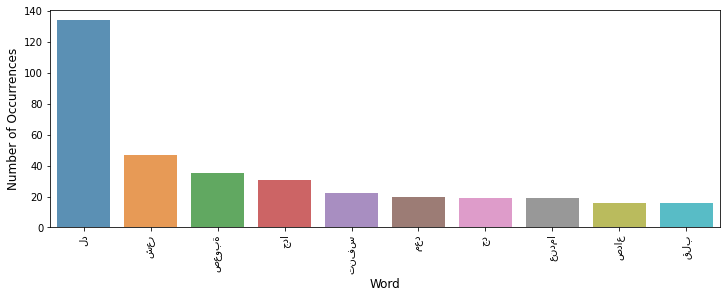

In [ ]:
import seaborn as sns
# count unique words

def counter_word(text_col):
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    return count


counter = counter_word(aug_datax2['transformed_phrase'])

#counter = counter_word(ailments_data[DATA_COLUMN])

num_unique_words = len(counter)
print("Total number of unique words : " + str(num_unique_words))

print(counter)

counted_df = pd.DataFrame(counter.items(), columns=['word', 'count']).sort_values(
    'count', ascending=False).reset_index(drop=True)  # create new df from counter

plt.figure(figsize=(12, 4))
# plot only the top 10 by slicing the df
sns.barplot(data=counted_df[:10], x='word', y='count', alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# vectorize

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec

In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def get_max_input_length(docs):
    max_input_length = 1
    for document in docs:
        words = text_to_word_sequence(document)
        document_length = len(words)
        if document_length > max_input_length:
            max_input_length = document_length

    return max_input_length

In [ ]:
# prepare tokenizer

t = Tokenizer()
t.fit_on_texts(aug_datax2['transformed_phrase'])
vocab_size = len(t.word_index) + 1
 # integer encode the documents
encoded_docs = t.texts_to_sequences(aug_datax2['transformed_phrase'])


print('encoded_docs:\n',max(encoded_docs))

max_length = 0

for doc in encoded_docs:
  if len(doc) > max_length:
    max_length = len(doc)


# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print('padded_docs:\n',padded_docs)

encoded_docs:
 [306, 2, 307]
padded_docs:
 [[ 26   3   5 ...   0   0   0]
 [ 26  74  52 ...   0   0   0]
 [ 13  75  87 ...   0   0   0]
 ...
 [ 24  20   1 ...   0   0   0]
 [  1  24  20 ...   0   0   0]
 [272  26   0 ...   0   0   0]]


In [ ]:
padded_docs.shape[1]

13

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(padded_docs)
df['label'] = aug_datax2[LABEL_COLUMN]
df.iloc[:,:padded_docs.shape[1]]


df=df.dropna()

# data split


In [ ]:
from sklearn.model_selection import train_test_split
#xtrain,ytrain, test = train_test_split(df, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:padded_docs.shape[1]], df['label'], test_size=0.15, random_state=42)
# # all_datasets.append(data_Hard)

# New Section

In [ ]:

y_train =y_train.astype('category')

In [ ]:
#y_train=y_train.dropna()
y_train.isna().sum()
#y_train

#y_train=y_train.dropna()
#X_train.isna().sum()
#y_train

0

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
def compute_accuracy(Y_true, Y_pred):  
    correctly_predicted = 0  
    # iterating over every label and checking it with the true sample  
    for true_label, predicted in zip(Y_true, Y_pred):  
        if true_label == predicted:  
            correctly_predicted += 1  
    # computing the accuracy score  
    accuracy_score = correctly_predicted / len(Y_true)  
    return accuracy_score  

In [ ]:
Y_pred = clf.predict(X_test)  
score = compute_accuracy(y_test, Y_pred)  

In [ ]:
score

0.2765957446808511

In [ ]:
Y_pred = clf.predict(X_train)  
score = compute_accuracy(y_train, Y_pred)  

In [ ]:
score

0.4659090909090909

In [ ]:

from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Y_pred_NB = Cnb.fit(X_train, y_train).predict(X_train)


In [ ]:
score_train = compute_accuracy(y_train, Y_pred_NB)  

In [ ]:
score_train

0.9204545454545454

In [ ]:

from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Y_pred_NB = Cnb.fit(X_train, y_train).predict(X_test)


In [ ]:
score_test = compute_accuracy(y_test, Y_pred_NB)  

In [ ]:
score_test

0.7446808510638298

In [ ]:
X_test

,0,1,2,3,4,5,6,7,8,9,10,11,12
290,20,3,8,0,0,0,0,0,0,0,0,0,0
9,54,7,91,92,43,0,0,0,0,0,0,0,0
57,1,200,16,35,101,100,0,0,0,0,0,0,0
60,2,33,201,202,4,203,0,0,0,0,0,0,0
25,1,77,78,0,0,0,0,0,0,0,0,0,0
63,1,45,9,47,102,204,205,102,103,206,207,0,0
92,1,150,149,151,0,0,0,0,0,0,0,0,0
184,132,1,163,12,164,0,0,0,0,0,0,0,0
244,12,42,140,141,142,0,0,0,0,0,0,0,0
46,195,4,46,1,0,0,0,0,0,0,0,0,0
